#   Credit Risk Analyzer with AI 


## Import Libraries


In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree

import matplotlib.pyplot as plot
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

import itertools

%matplotlib inline 

In [2]:
from sklearn.model_selection import train_test_split

## Load Data

In [3]:
credRisk ="credit_data.csv"
Credit = pd.read_csv(credRisk, sep=",")

## Data Information

In [4]:
Credit.head(5)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


In [5]:
Credit.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


In [6]:
Credit.isnull().sum()

age                  0
gender               0
education            0
occupation           0
organization_type    0
seniority            0
annual_income        0
disposable_income    0
house_type           0
vehicle_type         0
marital_status       0
no_card              0
default              0
dtype: int64

## Exploratory Data Analysis
### Observations
* Column no_card consists of outliers - As no_card is a binary variable, it cannot have 2.
* Most of the customers are between 20-30 years age group.
* No. of Salaried customers are much higher than other three categories.


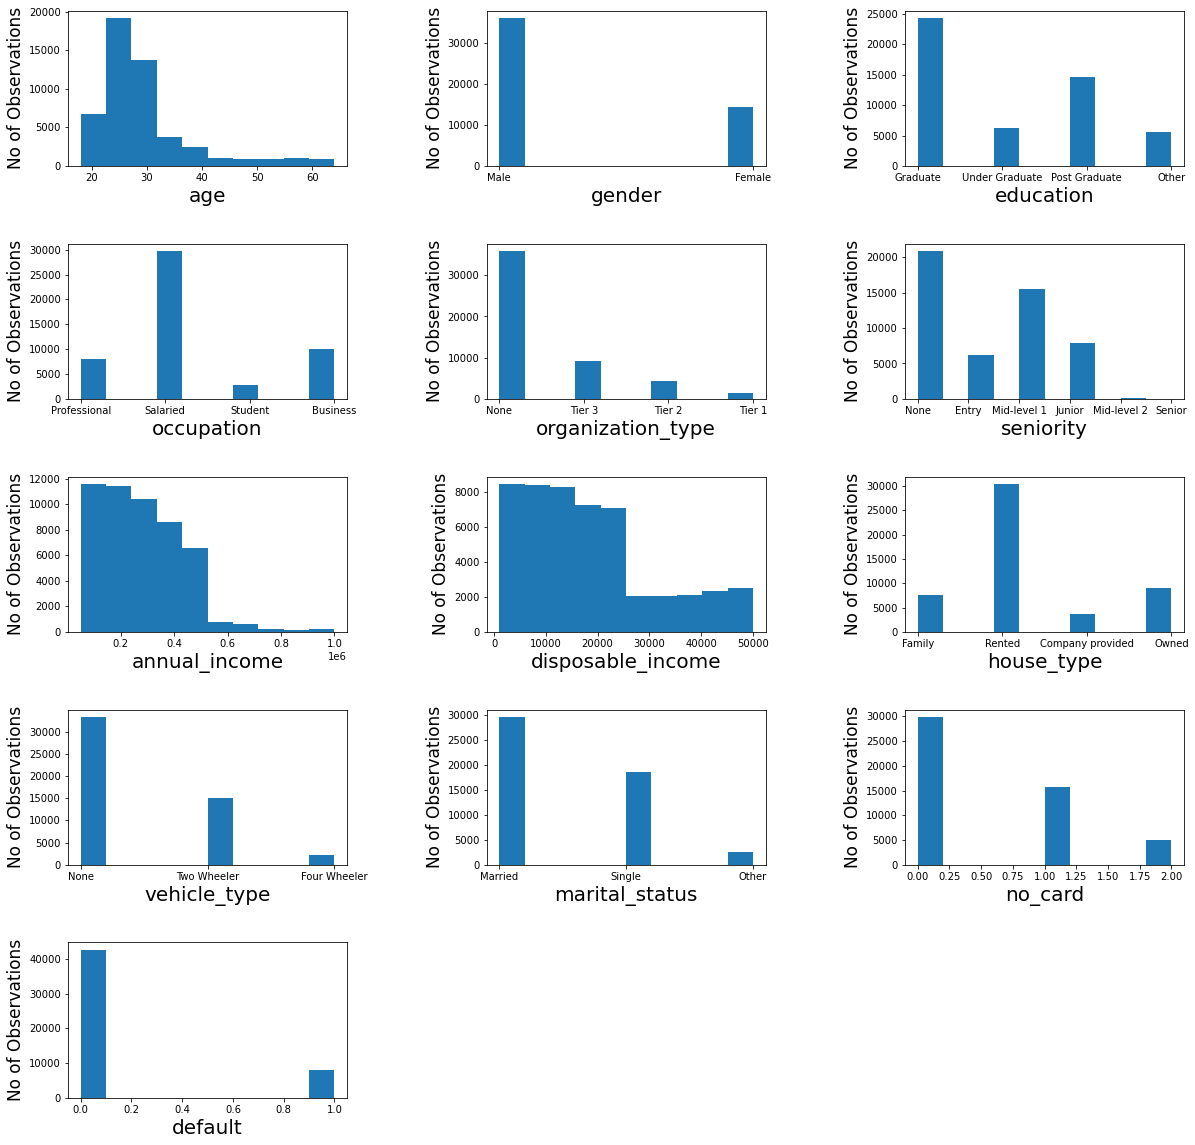

In [7]:
fig = plot.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, columns in zip(range(1, 14),Credit.columns):
    ax = fig.add_subplot(5, 3, i)
    ax.hist(Credit[columns])
    plot.xlabel(columns, fontsize="20")
    plot.ylabel('No of Observations', fontsize="17")

## Convert Categorical data to Numerical data

In [8]:
columns=Credit[['gender','education','occupation','organization_type','seniority','house_type','vehicle_type','marital_status']]

In [9]:
def Cat_conversion(cols):
    for i in cols:
        Credit[i]=Credit[i].astype("category").cat.codes
Cat_conversion(columns)
Credit.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,26,1,2,2,0,2,348745,19321,3,1,0,1,1


# Split data using train_test_split Method

In [10]:
Credit_train,Credit_test=train_test_split(Credit,test_size=0.3,random_state=1)

In [11]:
x_train=Credit_train[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]
x_test=Credit_test[['age', 'gender', 'education', 'occupation', 'organization_type','seniority', 'annual_income', 'disposable_income', 'house_type','vehicle_type', 'marital_status', 'no_card']]

y_train=Credit_train['default']
y_test=Credit_test['default']

In [12]:
training_accuracy = []
testing_accuracy = []
for depth in range(1,10):
    dt_tree = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    dt_tree.fit(x_train,y_train)
    training_accuracy.append(dt_tree.score(x_train,y_train))
    testing_accuracy.append(dt_tree.score(x_test,y_test))

In [13]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':training_accuracy, 'test_acc':testing_accuracy})
frame.head(10)

,max_depth,train_acc,test_acc
0,1,0.843053,0.838128
1,2,0.851009,0.847212
2,3,0.851883,0.847805
3,4,0.856708,0.853532
4,5,0.859811,0.858271
5,6,0.861165,0.857679
6,7,0.861927,0.857350
7,8,0.863958,0.856033
8,9,0.868303,0.854190


No handles with labels found to put in legend.


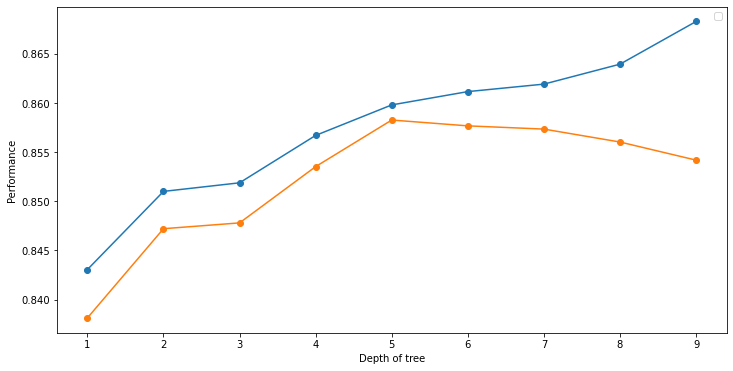

In [14]:
plot.figure(figsize = (12,6))
plot.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plot.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
plot.xlabel('Depth of tree')
plot.ylabel('Performance')
plot.legend()

## Build decision tree model and train it (entropy)

In [15]:
credit_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
credit_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [16]:
pred_tree = credit_tree.predict(x_test)
pred_tree[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Evaluation metrics

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

Confusion matrix, without normalization
[[12308   424]
 [ 1730   729]]


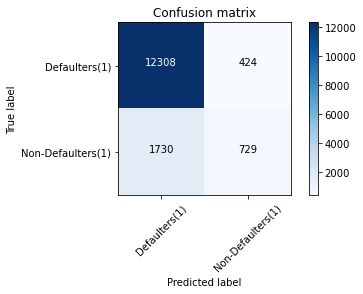

In [18]:
dt = confusion_matrix(y_test,pred_tree)
np.set_printoptions(precision=2)

plot.figure()
plot_confusion_matrix(dt, classes = ['Defaulters(1)', 'Non-Defaulters(1)'], normalize=False, title='Confusion matrix')

In [19]:
print("Accuracy:", accuracy_score(y_test, pred_tree)*100)

Accuracy: 85.82055164241986


## ROC Curve

In [20]:
probs = credit_tree.predict_proba(x_test)
pred = probs[:,1]
fpr,tpr,threshold = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

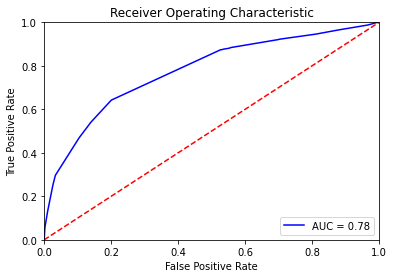

In [21]:
plot.title('Receiver Operating Characteristic')
plot.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([0, 1])
plot.ylim([0, 1])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()

## Build decision tree model and train it (gini)

In [35]:
credit_tree_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
credit_tree_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [36]:
pred_tree_gini = credit_tree_gini.predict(x_test)
pred_tree_gini[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
print("Accuracy:", accuracy_score(y_test, pred_tree_gini)*100)

Accuracy: 85.82713448752551
